Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.[Source](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.DEATH_EVENT.unique()# The is the target variable

array([1, 0], dtype=int64)

In [6]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
df.shape

(299, 13)

In [9]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


We need to standardize these values.

In [13]:
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [29]:
un_val=df.drop('DEATH_EVENT',axis=1).nunique().to_frame()
categorical_features=un_val[un_val[0]<3].index.tolist()
numeric_features=un_val[un_val[0]>2].index.tolist()
label='DEATH_EVENT'

In [28]:
df[numeric_features].describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


features like, creatinine_phosphokinase, time has large standard deviation from the mean.

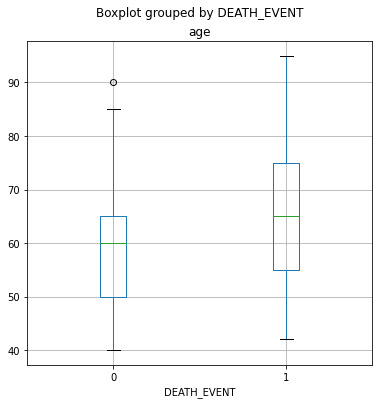

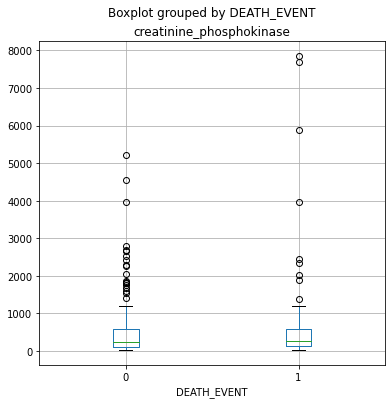

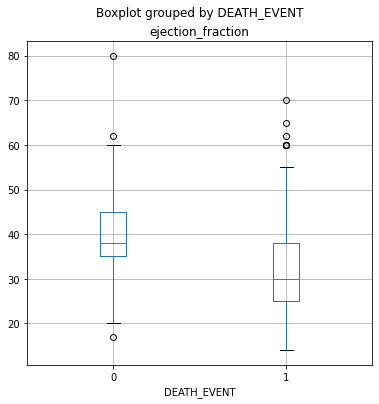

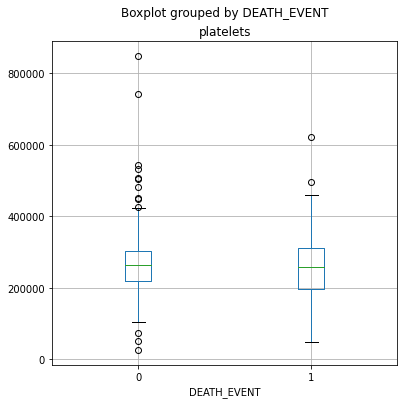

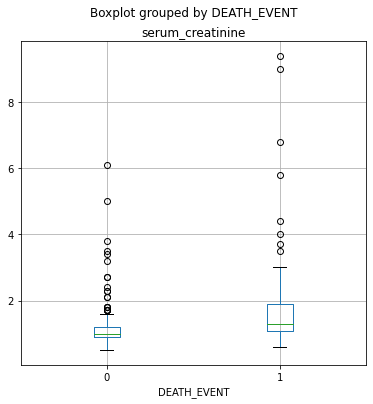

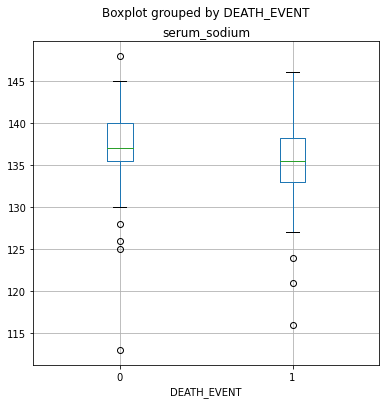

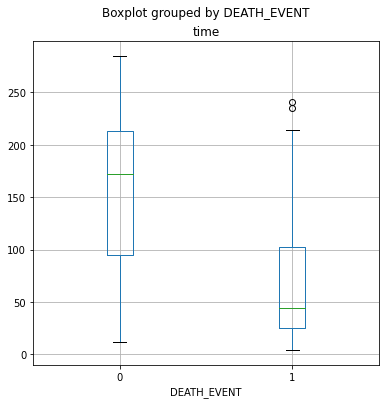

In [30]:
for col in numeric_features:
    df.boxplot(column=col,by=label,figsize=(6,6))
    plt.title(col)
plt.show()

Features like **time** shows alot of difference in distribution for DEATH_EVENT occuring than no DEATH_EVENT.
Also **Age**, **ejection_fraction** and **serum_cretinine** as has different distribution for both DEATH_EVENT due to heart attack.

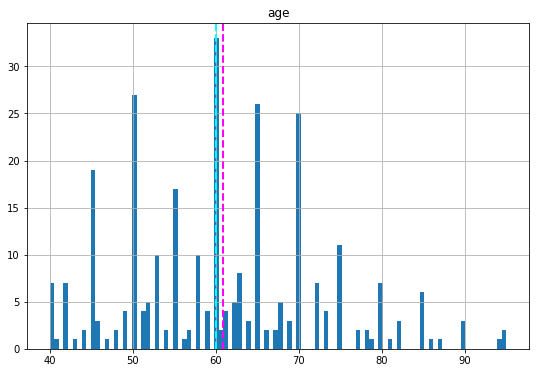

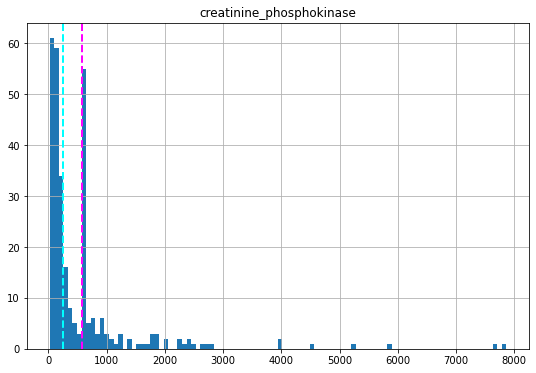

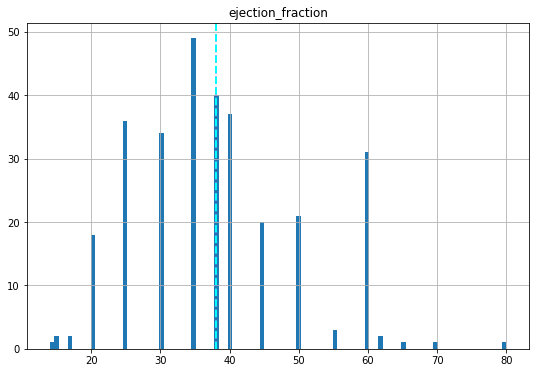

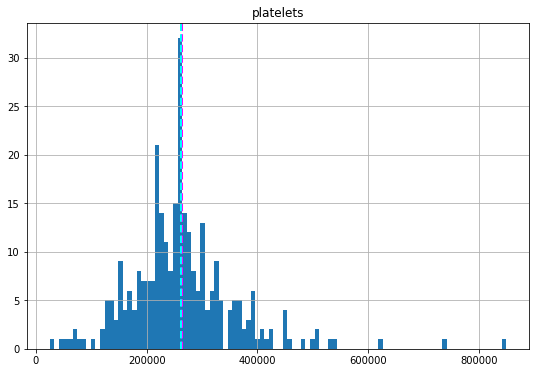

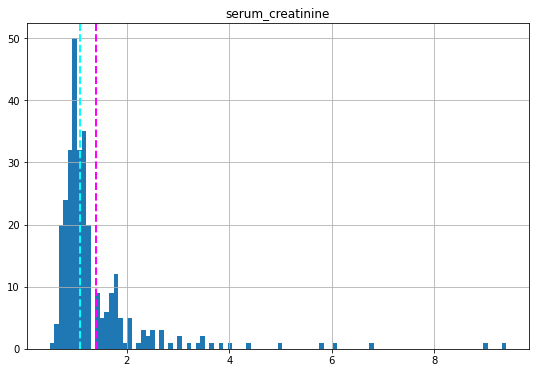

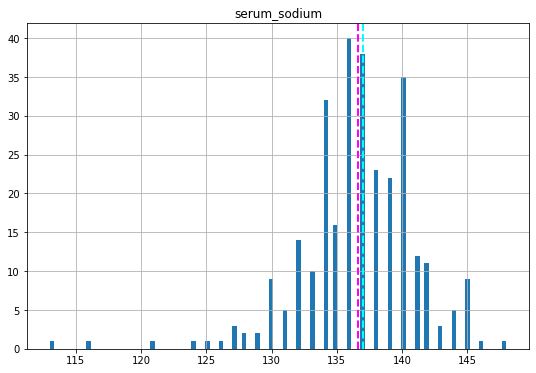

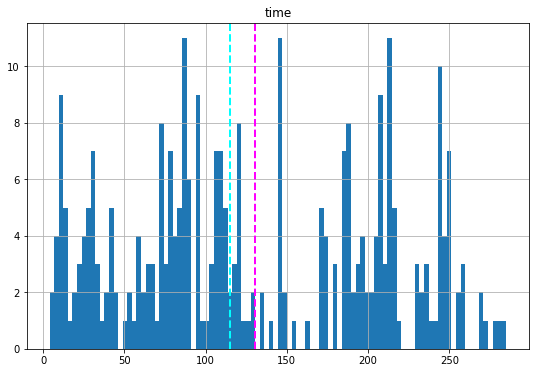

In [35]:
# Plot a histogram for each numeric feature
for col in numeric_features:
    fig =plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=100, ax=ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

In [32]:
df_new=df.drop('DEATH_EVENT',axis=1)

In [31]:
#print(f'There are about {}')
#df['DEATH_EVENT'].value_counts()

In [33]:
#Standardize the dataset
from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import StandardScaler
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
#scaler=StandardScaler()
df_new[numeric_features] = scaler.fit_transform(df_new[numeric_features])

In [34]:
df_new.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.636364,0,0.071319,0,0.090909,1,0.290823,0.157303,0.485714,1,0,0.000000
1,0.272727,0,1.000000,0,0.363636,0,0.288833,0.067416,0.657143,1,0,0.007117
2,0.454545,0,0.015693,0,0.090909,0,0.165960,0.089888,0.457143,1,1,0.010676
3,0.181818,1,0.011227,0,0.090909,0,0.224148,0.157303,0.685714,1,0,0.010676
4,0.454545,1,0.017479,1,0.090909,0,0.365984,0.247191,0.085714,0,0,0.014235


In [38]:
'''
# Plot a histogram for each numeric feature
for col in numeric_features:
    fig =plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = df_new[col]
    feature.hist(bins=100, ax=ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()
'''

"\n# Plot a histogram for each numeric feature\nfor col in numeric_features:\n    fig =plt.figure(figsize=(9,6))\n    ax = fig.gca()\n    feature = df_new[col]\n    feature.hist(bins=100, ax=ax)\n    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)\n    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)\n    ax.set_title(col)\nplt.show()\n"

## Shuffle and Split

In [39]:
X,y=df_new.values, df['DEATH_EVENT'].values

In [40]:
from sklearn.model_selection import train_test_split
# Split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

## Train

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# TODO: Initialize the classifier
clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=2),random_state=42,learning_rate=args.learning_rate)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {"n_estimators": [200,400],
              "learning_rate": [ .01, 0.05, 0.1]}